# Exercise

# #1

In [1]:
#Implement PCA from scratch using the covariance way (there is SVD approach as well)
#Comprises of the following steps:
#1. standardize the data, i.e., center the data (when you standardize, standardize the data, not features)
#2. Find covariance of the matrix.  You can use np.cov
#3. Then simply find the eigenvalues using np.linalg.eig by inputting the covariance matrix
#4. Your nth principal components will be your first nth eigenvectors with highest eigenvalues
#5. Try with same data as the lecture in the beginningg and plot the loading using 
#draw_vector in the lecture.  See whether you got the same result
#use the same data as our lecture; see below

(200, 2)


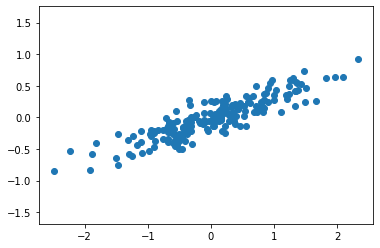

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

print(X.shape)

# #2

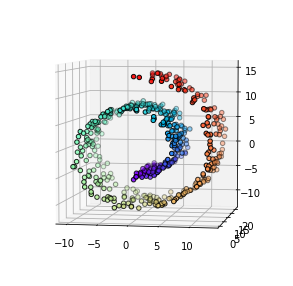

In [3]:
#use the following data
from sklearn import manifold, datasets

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

#elevation and #azimuth
ax.view_init(5, -80)

X, color = datasets.make_swiss_roll(n_samples=500, noise=0.3)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap="rainbow",
          edgecolor='k')

#Extend #2 to support KernelPCA for rbf kernel
#You may want to see how to transfer your data to another space
#via https://en.wikipedia.org/wiki/Radial_basis_function_kernel
#and this http://rasbt.github.io/mlxtend/user_guide/feature_extraction/RBFKernelPCA/#References
#for those who are confused what is x and x' (prime), they are basically each sample
#so you may want to first find the squared distances between each sample

#1). Calculate (x-x')^2
#For your convenience, to get the squared distances can be done using the pdist module
#Then transform it into a square form using squareform module

#from scipy.spatial.distance import pdist 
#distances = pdist(X, 'sqeuclidean')
#matrix = squareform(squared_distances)

#BTW, if you prefer the numpy way, it is also perfectly fine!

#2). Center the data
#This is a bit tricky but 
#http://rasbt.github.io/mlxtend/user_guide/feature_extraction/RBFKernelPCA/#References
#has provided us how to center the rbf data

#3). Calculate rbf = exp(-gamma * matrix)
#as for gamma, you can actually pick whatever gamma you prefer
#then you would want to calculate the rbf kernel
#rbf = np.exp(-gamma * matrix)

#once you obtain the rbf, you DO NOT need to input into the
#np.cov, because by performing squared_distances we are actually doing
#covariances but in rbf space. (Notice we are not doing x - x'
#in normal covariance way, but (x - x')^2)

#4).  Use eig to calculate the eigenvectors and values

#5). Get the projection and plot it
#When you project your data, you do rbf @ eigenvectors, NOT X @ eigenvectors
#since your eigenvectors are in rbf space

#yes, that's it!


# #3

In [4]:
#Implement ISOmap from scratch

#reduced to 200 samples for peace of mind
X, color = datasets.make_swiss_roll(n_samples=200, noise=0.3)

#since ISOmap is essential very similar to MDS
#but instead of a simple distance matrix, it feeds
#in a shortest path matrix instead, hence
#the geodesic distances

#First, compute the distances.  Make sure it is euclidean for this
#step.  Also make sure that the distance matrix should have
#values for only the nth nearest neighbors.  Otherwise, values
#should be infinity.  Infinity will be later on used by
#Floyd algorithm to determine the shortest paths
#Last, treat this distance matrix as undirected graph, which means
# distance[i][j] should be same as distance[j][i]

#Second, input the distance matrix into Floyd algorithm.
#this part can be unfamiliar for those who did not study
#Data Structures and Algorithms.  
#Floyd Warshall algorithm is basically a all-pairs shortest-path algorithm 
#It is pretty straightforward algorithm in which you loop through
#all possible pair of vertices and their possible paths
#and keep on updating if shorter path is found
#this is implemented based on pseudocode given in
#https://en.wikipedia.org/wiki/Floyd–Warshall_algorithm
#for those who want to first get an intuition
#watch this https://www.youtube.com/watch?v=4OQeCuLYj-4
#Here is how the floyd algorithm can be implemented in Python
def floydWarshall(distance_matrix):
    #shorten the name for shorter code!
    #I write the long name as param so you guys will know
    #what is it that is being input to floyd
    dist = distance_matrix
    length = len(dist)
    for k in range(length):
        for i in range(length):
            for j in range(length):
                dist[i][j] = min(dist[i][j],dist[i][k] + dist[k][j])
    return graph_matrix

#Third, you need to feed the graph matrix to the MDS
#algorithm.  This MDS algorithm is quite straightforward as well.
#For simplicity, you can follow the steps written in 
#https://en.wikipedia.org/wiki/Multidimensional_scaling
#in topic "Steps of a classical MDS algorithm"
#1).  Squared the incoming matrix return my floyd
#2).  Perform double centering which center the data, and remove asymmetrical distances by multiplying 0.5
#3).  Use elg() to find eigenvalues and eigenvectors
#4).  The new X = Em(Am)^1/2, where EM is eigenvectors and Am is the
#.    diagonal matrix of eigenvalues

#Phew, it may look hard, but it is always satisfying to understand the math behind!

# Solution

# #1

[0.7625315 0.0184779]
[[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]
Variance explained_ratio:  [0.97634101 1.        ]
Eigenvalues:  [0.7625315 0.0184779]
Eigenvectors (column-wise):  [[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]
Mean:  [ 0.03351168 -0.00408072]
Old X shape:  (200, 2)
Projected X shape:  (200, 2)


(-2.914479864281029,
 2.7272887805678496,
 -0.3395486490510208,
 0.4280959368786509)

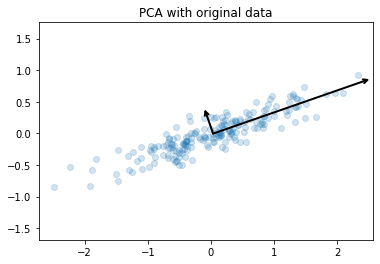

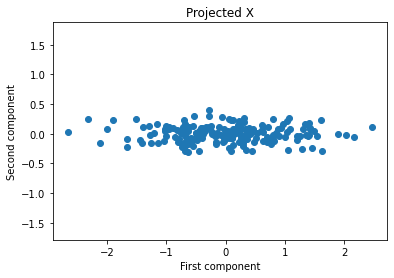

In [5]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

def PCA(X, n_components=2, whiten=False):
    #1. center the data (center the data, not features, thus axis=0)
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = X - mean  
    
    if(whiten):
        X = X / std
        
    #double check that you did not cut anything but simply standardize
    assert X.shape == X.shape

    #2. Find covariance of the matrix.  You can use np.cov
    #looking at the manual, numpy.cov expects X = [x1, x2, ...].T
    cov = np.cov(X.T)

    #manual way, fyi (the reason we can X.T @ X right away since we already center the data)
    #did not really use this variable
    cov_manual = (X.T @ X) / (X.shape[0] - 1)
    
    #confirm that they are different
    assert np.allclose(cov, cov_manual)
    
    #make sure covariance is a cross matrix between features
    assert X.shape[1], X.shape[1] == cov.shape

    #3. Then simply find the eigenvalues using np.linalg.eig by inputting the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    
    print(eigenvalues)
    print(eigenvectors)

    #4. Your nth principal components will be your first nth eigenvectors with highest eigenvalues
    ix = np.argsort(eigenvalues)[::-1] #sort them from biggest to smallest thus -1

    if(n_components > eigenvalues.shape[0]):
        raise Exception("You cannot have n_components more than number of features!")
    else:
        eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
        #get the first nth components
        eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]


    #define how much variance is gained after each component
    variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

    #projected new vector
    #during projection, eigenvectors mush be arranged in columns
    projected_X = X @ eigenvectors
    
    #print all info
    print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
    print("Eigenvalues: ", eigenvalues)
    print("Eigenvectors (column-wise): ", eigenvectors)
    print("Mean: ", mean)
    print("Old X shape: ", X.shape)
    print("Projected X shape: ", projected_X.shape)
    
    #return only n_components eigenvalues and vectors
    return eigenvalues, eigenvectors, mean, projected_X

#copy code from the lectures to plot the eigen values and vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  #get current axis
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

#main code
eigenvalues, eigenvectors, mean, projected_X = PCA(X, n_components=2)

#looking at the original graph with the loadings
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

#.T so each row is eigenvector, so we can loop
for length, vector in zip(eigenvalues, eigenvectors.T):
    #loadings = eigenvector * (unit size) * sqrt (eigenvalue)
    v = vector * 3 *  np.sqrt(length)
    draw_vector(mean, mean + v)
plt.axis('equal')
plt.title('PCA with original data')

#projection
#you can see that lots of data in the second components is gone
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal')

# #2

Kernel shape:  (1500, 1500)
Variance explained_ratio:  [0.55726925+0.j 1.        +0.j]
Eigenvalues:  (2,)
Eigenvectors (column-wise):  (1500, 2)
Mean:  [ 0.03351168 -0.00408072]
Old X shape:  (1500, 3)
Projected X shape:  (1500, 2)


/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


(-0.019958624594982037,
 0.02033832619963654,
 -0.02062119856020974,
 0.0210129831966818)

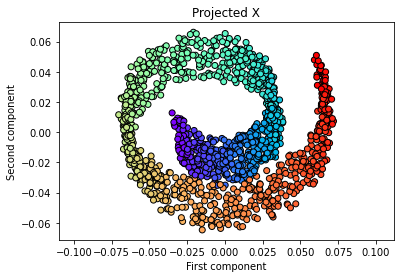

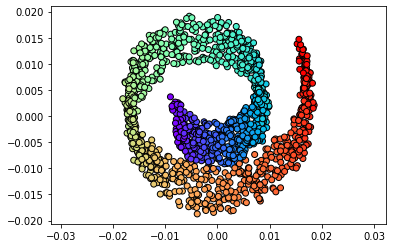

In [6]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

from sklearn import manifold, datasets
X, color = datasets.make_swiss_roll(n_samples=1500, noise=0.3)

#see below cell for numpy way
squared_distances = pdist(X, 'sqeuclidean')
squared_distances_matrix = squareform(squared_distances)

#make sure that each sample is subtracted with each sample
assert X.shape[0], X.shape[0] == squared_distances_matrix.shape 

#let's say we have gamma 0.00001
#Recap: smaller gamma gives you low bias and high variance
#large gamma will give you higher bias and low variance
#Basically, gamma is 1/(2*sigma^(2)) but we simply make it easier
#thus if we choose very big sigma (high variance), then gamma will be small
#hence smaller gamma gives you higher variance
gamma = 0.00001

#you should be able to use scipy version of exp too!
rbf = np.exp(-gamma * squared_distances_matrix)
print("Kernel shape: ", rbf.shape)

#since we did not perform any centering yet, 
#we can use this formula K′=K−1_{N}K−K1_{N}+1_{N}K1_{N}
#this 1_{n} is a N X N matrix with all values equal to 1/N
n_samples = X.shape[0]
one_over_n = np.ones((n_samples, n_samples)) / n_samples
rbf = rbf - (one_over_n @ rbf) - (rbf @ one_over_n) + (one_over_n @ rbf @ one_over_n)    
    
#rbf is essentially covariances in rbf space, so simply insert the rbf inside the eig func
eigenvalues, eigenvectors = np.linalg.eig(rbf)

# sorting eigenvalues from biggest to smallest
ix = np.argsort(eigenvalues)[::-1]

#hard code it
n_components = 2

if(n_components > eigenvalues.shape[0]):
    raise Exception("You cannot have n_components more than number of features!")
else:
    eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
    #I did not have .T here since I will not be looping
    eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]
        
    #define how much variance is gained after each component
    variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

    #projected new vector
    #instead of projecting the X to the eigenvectors
    #we project the kernel onto the eigenvectors
    projected_X = rbf @ eigenvectors
    
    #print all info
    print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
    print("Eigenvalues: ", eigenvalues.shape)
    print("Eigenvectors (column-wise): ", eigenvectors.shape)
    print("Mean: ", mean)
    print("Old X shape: ", X.shape)
    print("Projected X shape: ", projected_X.shape)

#projection
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1], c=color,
           cmap="rainbow", edgecolor='k')
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal')

#compare with sklearn kernel pca
from sklearn.decomposition import KernelPCA
model = KernelPCA(kernel="rbf", n_components=2,
                 gamma=0.000001)
out = model.fit_transform(X)
plt.figure()
plt.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')
plt.axis('equal')

In [7]:
#for those who do not understand what does pdist and squareform does
test = np.arange(6).reshape((3, 2))
print("Input data: ", test)

sq = pdist(test, 'sqeuclidean')
print("Square distance: ", sq)

some_mat = squareform(sq)
print("Matrix form: ", some_mat)

#basically it is just (x - x')^2 along the columns (feature space)

#numpy way
print("Numpy: ", ((test[:, np.newaxis, :] - test[np.newaxis, :, :]) ** 2).sum(2))

#sklearn way
from sklearn import metrics
m = metrics.pairwise_distances(test, test)
print("Sklearn way: ", m**2)

Input data:  [[0 1]
 [2 3]
 [4 5]]
Square distance:  [ 8. 32.  8.]
Matrix form:  [[ 0.  8. 32.]
 [ 8.  0.  8.]
 [32.  8.  0.]]
Numpy:  [[ 0  8 32]
 [ 8  0  8]
 [32  8  0]]
Sklearn way:  [[ 0.  8. 32.]
 [ 8.  0.  8.]
 [32.  8.  0.]]


# #3

Variance explained_ratio:  [0.55706377 1.        ]
Eigenvalues:  (2,)
Eigenvectors (column-wise):  (200, 2)
Mean:  [ 0.03351168 -0.00408072]
Old X shape:  (200, 3)
Projected X shape:  (200, 2)


(-20.81951096279327,
 21.127512784387275,
 -14.430745566694181,
 21.189926480767422)

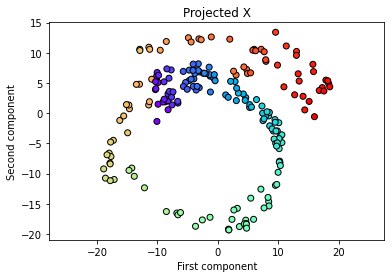

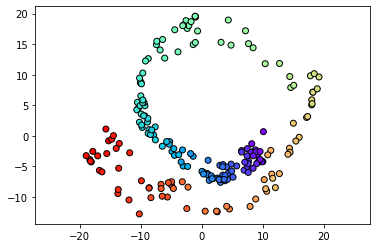

In [8]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

from sklearn import manifold, datasets
from scipy.sparse.csgraph import shortest_path

#reduced to 300 samples for peace of mind
X, color = datasets.make_swiss_roll(n_samples=200, noise=0.3)

#copy the floyd warshall algorithm from above
#you can actually use this as well:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.floyd_warshall.html
def floyd(distance_matrix):
    #shorten the name for shorter code!
    #I write the long name as param so you guys will know
    #what is it that is being input to floyd. Does not hurt to
    #make things more readable
    dist = distance_matrix
    length = len(dist)
    for k in range(length):
        for i in range(length):
            for j in range(length):
                dist[i][j] = min(dist[i][j],dist[i][k] + dist[k][j])
    return dist

#very similar to above but use euclidean 
#since Floyd uses that
#Also, do not forget to only assign distance of nearest neighbors
#to the distance matrix
def make_dist_matrix(X, n_neighbors=10):
    
    #find distance matrix
    dist_mat = squareform(pdist(X, 'euclidean'))
    #make sure that each sample is subtracted with each sample
    assert X.shape[0], X.shape[0] == dist_mat.shape 
    
    n_samples = X.shape[0]
    dist = np.ones((n_samples, n_samples)) * np.inf
    for i in range(n_samples):    
        #get n nearest neighbors
        index_arr = np.argsort(dist_mat[i])[:n_neighbors]
        #put only n nearest neighbors distance into the matrix
        #otherwise, let it be infinity
        for j in index_arr:
            dist[i][j] = dist_mat[i][j]
            #i j is same as j i for undirected matrix
            #clearly, mds or isomap does not care about direction
            #it only cares about the neighbors, thus we
            #need to treat this matrix as undirected graph
            dist[j][i] = dist_mat[i][j]

    return dist
    
#very similar to kernel pca (since rbf is kinda like gaussian, right?)
def mds(graph_mat):
    mat = graph_mat**2
    n_samples = graph_mat.shape[0]

    #we can center the data using "centering matrix"
    #https://en.wikipedia.org/wiki/Centering_matrix
    identity = np.identity(n_samples)
    ones = np.ones((n_samples, n_samples))
    
    #C_{n} = I_{n} - 1/n * 11.T
    centering_matrix = identity -  (1/n_samples) * ones 
    
    #centering_mat @ mat removes the mean from each of n columns
    #mat @ centering_mat removes the mean from each of m rows
    #by doing both, both row and column means are equal to zero
    #-0.5 is for "double centering" as specify in step 2 in the wikipedia
    mat = -0.5 * (centering_matrix @ mat @ centering_matrix)
    
    #mat is essentially covariances in gaussian space (i.e., nearest neighbors)
    eigenvalues, eigenvectors = np.linalg.eig(mat)

    # sorting eigenvalues from biggest to smallest
    ix = np.argsort(eigenvalues)[::-1]

    #hard code it
    n_components = 2

    if(n_components > eigenvalues.shape[0]):
        raise Exception("You cannot have n_components more than number of features!")
    elif(n_components > n_samples):
        #https://stackoverflow.com/questions/51040075/why-sklearn-pca-needs-more-samples-than-new-featuresn-components
        raise Exception("You also cannot have n_components more than number of samples!  You won't be able to find the eigenvalues and vectors!")
    else:
        eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
        eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]

        #define how much variance is gained after each component
        variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

        #projected new vector
        #based on https://en.wikipedia.org/wiki/Multidimensional_scaling
        #"Steps of a classical MDS algorithm - Step 4"
        Em = eigenvectors
        Am = np.diag(eigenvalues)
        projected_X = Em @ np.sqrt(Am)

        #print all info
        print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
        print("Eigenvalues: ", eigenvalues.shape)
        print("Eigenvectors (column-wise): ", eigenvectors.shape)
        print("Mean: ", mean)
        print("Old X shape: ", X.shape)
        print("Projected X shape: ", projected_X.shape)
        
        return projected_X
        
#first, find the euclidean distance matrix
#then, find the shortest path matrix based on floyd which
#gives the geodesic distance
#last, input into mds

# projected_X = mds(shortest_path(make_dist_matrix(X, n_neighbors=10), method='FW', directed=False))
projected_X = mds(floyd(make_dist_matrix(X, n_neighbors=10)))

#projection
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1], c=color,
           cmap="rainbow", edgecolor='k')
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal')

#compare with sklearn isomap
from sklearn.manifold import Isomap
model = Isomap(n_neighbors=10, n_components=2)
out = model.fit_transform(X)
plt.figure()
plt.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')
plt.axis('equal')